http://lib.stat.cmu.edu/datasets/Plasma_Retinol

Determinants of Plasma Retinol and Beta-Carotene Levels

Summary:
Observational studies have suggested that low dietary intake or low plasma concentrations of retinol, beta-carotene, or other carotenoids might be associated with increased risk of developing certain types of cancer.  However, relatively few studies have investigated the determinants of plasma concentrations of these micronutrients. We designed a cross-sectional study to investigate the relationship between personal characteristics and dietary factors, and plasma concentrations of retinol, beta-carotene and other carotenoids. Study subjects (N = 315) were patients who had an elective surgical procedure during a three-year period to biopsy or remove a lesion of the lung, colon, breast, skin, ovary or uterus that was found to be non-cancerous. We display the data for only two of the analytes.
	Plasma concentrations of the micronutrients varied widely from subject to subject.  While plasma retinol levels varied by age and sex, the only dietary predictor was alcohol consumption (R^2 = .38). Plasma beta-carotene levels were log-transformed prior to the analyses due to severe asymmetry of the residuals on the original scale. For log beta-carotene, dietary intake, regular use of vitamins, and intake of fiber were associated with higher plasma concentrations, while Quetelet Index (defined as weight/height^2 in the units kg/m^2) and cholesterol intake were associated with lower plasma levels, adjusting for the other factors (R^2 = .50). There was one extremely high leverage point in alcohol consumption that was deleted prior to the analyses. Plasma concentrations of retinol and beta-carotene were not correlated.
	We conclude that there is wide variability in plasma concentrations of these micronutrients in humans, and that much of this variability is associated with dietary habits and personal characteristics.  A better understanding of the physiological relationship between some personal characteristics and plasma concentrations of these micronutrients will require further study.

Authorization: Contact Authors

Reference: These data have not been published yet but a related reference is
Nierenberg DW, Stukel TA, Baron JA, Dain BJ, Greenberg ER.  Determinants of plasma levels of beta-carotene and retinol.  American Journal of Epidemiology 1989;130:511-521.

Description:  This datafile contains 315 observations on 14 variables.  This data set can be used to demonstrate multiple regression, transformations, categorical variables, outliers, pooled tests of significance and model building strategies. 

Variable Names in order from left to right:
	AGE: Age (years)  
	SEX: Sex (1=Male, 2=Female)  
	SMOKSTAT: Smoking status (1=Never, 2=Former, 3=Current Smoker)  
	QUETELET: Quetelet (weight/(height^2))  
	VITUSE: Vitamin Use (1=Yes, fairly often, 2=Yes, not often, 3=No)  
	CALORIES: Number of calories consumed per day  
	FAT: Grams of fat consumed per day  
	FIBER: Grams of fiber consumed per day  
	ALCOHOL: Number of alcoholic drinks consumed per week  
	CHOLESTEROL: Cholesterol consumed (mg per day)  
	BETADIET: Dietary beta-carotene consumed (mcg per day)  
	RETDIET: Dietary retinol consumed (mcg per day)  
	BETAPLASMA: Plasma beta-carotene (ng/ml)  
	RETPLASMA: Plasma Retinol (ng/ml)  

Детерминанты уровней ретинола и бета-каротина в плазме

Краткое содержание:
Обсервационные исследования показали, что низкое потребление с пищей или низкие концентрации ретинола, бета-каротина или других каротиноидов в плазме могут быть связаны с повышенным риском развития некоторых видов рака. Тем не менее, относительно небольшое количество исследований изучало детерминанты концентрации этих микроэлементов в плазме крови. Мы разработали поперечное исследование для изучения взаимосвязи между личными характеристиками и диетическими факторами, а также концентрацией ретинола, бета-каротина и других каротиноидов в плазме. Субъектами исследования (N = 315) были пациенты, перенесшие плановую хирургическую процедуру в течение трехлетнего периода для биопсии или удаления поражений легкого, толстой кишки, молочной железы, кожи, яичников или матки, которые оказались нераковыми. Мы отображаем данные только для двух аналитов.
Концентрации микронутриентов в плазме сильно различались от субъекта к субъекту. В то время как уровни ретинола в плазме варьировались в зависимости от возраста и пола, единственным диетическим предиктором было потребление алкоголя (R ^ 2 = 0,38). Уровни бета-каротина в плазме были логарифмически преобразованы перед анализом из-за серьезной асимметрии остатков по исходной шкале. Для log бета-каротина потребление с пищей, регулярное употребление витаминов и потребление клетчатки были связаны с более высокими концентрациями в плазме, в то время как индекс Кетле (определяемый как вес/рост^2 в единицах кг/м^2) и потребление холестерина были связаны с более низкими уровнями в плазме с поправкой на другие факторы (R ^ 2 = 0,50). В потреблении алкоголя была одна чрезвычайно важная точка воздействия, которая была удалена до анализа. Концентрации ретинола и бета-каротина в плазме не коррелировали.
Мы пришли к выводу, что концентрация этих микроэлементов в плазме крови у людей сильно различается, и большая часть этой изменчивости связана с диетическими привычками и личными характеристиками. Для лучшего понимания физиологических взаимосвязей между некоторыми личностными характеристиками и концентрацией этих микроэлементов в плазме потребуются дальнейшие исследования.

Авторизация: Связаться с авторами  

Ссылка: эти данные еще не опубликованы, но соответствующая ссылка есть.
Ниренберг Д.В., Штукель Т.А., Барон Дж.А., Дейн Б.Дж., Гринберг Э.Р. Детерминанты уровня бета-каротина и ретинола в плазме. Американский журнал эпидемиологии 1989;130:511-521.

Описание: Этот файл данных содержит 315 наблюдений по 14 переменным. Этот набор данных можно использовать для демонстрации множественной регрессии, преобразований, категориальных переменных, выбросов, объединенных тестов значимости и стратегий построения моделей.

Имена переменных в порядке слева направо:  
ВОЗРАСТ: Возраст (лет)  
ПОЛ: Пол (1=мужской, 2=женский)  
SMOKSTAT: Статус курения (1=Никогда, 2=Бывший, 3=Текущий курильщик)  
КЕТЛЕ: Индекс массы тела (вес/(рост^2))  
VITUSE: употребление витаминов (1=да, довольно часто, 2=да, не часто, 3=нет)  
КАЛОРИИ: Количество калорий, потребляемых в день  
ЖИР: граммы жира, потребляемые в день  
ВОЛОКНО: Количество потребляемой клетчатки в граммах в день  
АЛКОГОЛЬ: Количество алкогольных напитков, выпитых за неделю  
ХОЛЕСТЕРИН: потребляемый холестерин (мг в день)  
BETADIET: потребление бета-каротина с пищей (мкг в день)  
RETDIET: потребление ретинола с пищей (мкг в день)  
БЕТАПЛАЗМА: Бета-каротин плазмы (нг/мл)  
RETPLASMA: ретинол плазмы (нг/мл)  

In [283]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
df = pd.read_csv('/home/roman/pbc/Untitled Document 1', header=None, delimiter = "\t")
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,64,2,2,21.48380,1,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,2,1,23.87631,1,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,2,2,20.01080,2,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,2,2,25.14062,3,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,2,1,20.98504,1,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799


AGE: Age (years)  
SEX: Sex (1=Male, 2=Female)  
SMOKSTAT: Smoking status (1=Never, 2=Former, 3=Current Smoker)  
QUETELET: Quetelet (weight/(height^2))  
VITUSE: Vitamin Use (1=Yes, fairly often, 2=Yes, not often, 3=No)  
CALORIES: Number of calories consumed per day  
FAT: Grams of fat consumed per day  
FIBER: Grams of fiber consumed per day  
ALCOHOL: Number of alcoholic drinks consumed per week  
CHOLESTEROL: Cholesterol consumed (mg per day)  
BETADIET: Dietary beta-carotene consumed (mcg per day)  
RETDIET: Dietary retinol consumed (mcg per day)  
BETAPLASMA: Plasma beta-carotene (ng/ml)  
RETPLASMA: Plasma Retinol (ng/ml)  

In [285]:
df = df.rename(columns={0: 'AGE'
                        , 1: 'SEX'
                        , 2: 'SMOKSTAT'
                        , 3: 'QUETELET'
                        , 4: 'VITUSE'
                        , 5: 'CALORIES'
                        , 6: 'FAT',7: 'FIBER', 8: 'ALCOHOL',9: 'CHOLESTEROL', 10: 'BETADIET', 11: 'RETDIET', 12: 'BETAPLASMA', 13: 'RETPLASMA'})

In [286]:
df.head(3)

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
0,64,2,2,21.48380,1,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,2,1,23.87631,1,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,2,2,20.01080,2,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721


In [287]:
df.dtypes

AGE              int64
SEX              int64
SMOKSTAT         int64
QUETELET       float64
VITUSE           int64
CALORIES       float64
FAT            float64
FIBER          float64
ALCOHOL        float64
CHOLESTEROL    float64
BETADIET         int64
RETDIET          int64
BETAPLASMA       int64
RETPLASMA        int64
dtype: object

In [288]:
df.isna().sum()

AGE            0
SEX            0
SMOKSTAT       0
QUETELET       0
VITUSE         0
CALORIES       0
FAT            0
FIBER          0
ALCOHOL        0
CHOLESTEROL    0
BETADIET       0
RETDIET        0
BETAPLASMA     0
RETPLASMA      0
dtype: int64

In [289]:
df.shape

(315, 14)

In [290]:
df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})
df['SMOKSTAT'] = df['SMOKSTAT'].map({1: 'Never', 2: 'Former', 3: 'Current_Smoker'})
df['VITUSE'] = df['VITUSE'].map({1: 'Yes,fairly often', 2: 'Yes,not often', 3: 'No'})

In [291]:
df.head()

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
0,64,Female,Former,21.48380,"Yes,fairly often",1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,"Yes,fairly often",1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,"Yes,not often",2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,"Yes,fairly often",1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799


In [292]:
#df.hist(sharex=True, sharey=True, grid=False)
#plt.tight_layout()

In [293]:
df.columns

Index(['AGE', 'SEX', 'SMOKSTAT', 'QUETELET', 'VITUSE', 'CALORIES', 'FAT',
       'FIBER', 'ALCOHOL', 'CHOLESTEROL', 'BETADIET', 'RETDIET', 'BETAPLASMA',
       'RETPLASMA'],
      dtype='object')

In [294]:
df.head(3)

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
0,64,Female,Former,21.48380,"Yes,fairly often",1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,"Yes,fairly often",1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,"Yes,not often",2372.3,83.6,19.1,14.1,257.9,6321,660,328,721


In [295]:
df.AGE.describe()

count    315.000000
mean      50.146032
std       14.575226
min       19.000000
25%       39.000000
50%       48.000000
75%       62.500000
max       83.000000
Name: AGE, dtype: float64

In [296]:
df.query('AGE == 19')

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
83,19,Female,Never,29.24145,"Yes,fairly often",2558.9,116.1,12.3,0.0,324.5,1498,1066,327,693


In [297]:
df['age_bins'] = pd.cut(x=df['AGE'], bins=[18, 33, 47, 61, 75, 83])

In [298]:
df[['AGE', 'QUETELET', 'CALORIES', 'FAT', 'FIBER', 'ALCOHOL', 'CHOLESTEROL', 'BETADIET', 'RETDIET', 'BETAPLASMA', 'RETPLASMA']].describe()

,AGE,QUETELET,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,50.146032,26.157374,1796.654603,77.033333,12.788571,3.279365,242.460635,2185.603175,832.714286,189.892063,602.790476
std,14.575226,6.013550,680.347435,33.829443,5.330192,12.322880,131.991614,1473.886547,589.289030,183.000803,208.895474
min,19.000000,16.331140,445.200000,14.400000,3.100000,0.000000,37.700000,214.000000,30.000000,0.000000,179.000000
25%,39.000000,21.799715,1338.000000,53.950000,9.150000,0.000000,155.000000,1116.000000,480.000000,90.000000,466.000000
50%,48.000000,24.735250,1666.800000,72.900000,12.100000,0.300000,206.300000,1802.000000,707.000000,140.000000,566.000000
75%,62.500000,28.853415,2100.450000,95.250000,15.600000,3.200000,308.850000,2836.000000,1037.000000,230.000000,716.000000
max,83.000000,50.403330,6662.200000,235.900000,36.800000,203.000000,900.700000,9642.000000,6901.000000,1415.000000,1727.000000


In [299]:
df.isna().sum()

AGE            0
SEX            0
SMOKSTAT       0
QUETELET       0
VITUSE         0
CALORIES       0
FAT            0
FIBER          0
ALCOHOL        0
CHOLESTEROL    0
BETADIET       0
RETDIET        0
BETAPLASMA     0
RETPLASMA      0
age_bins       0
dtype: int64

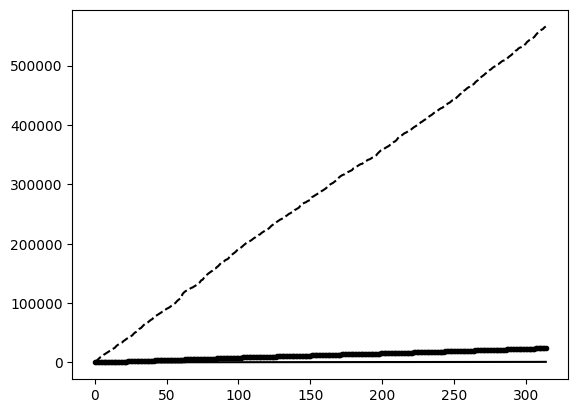

In [300]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(df['CALORIES'].cumsum(), 'k--', label="CALORIES")
ax.plot(df['FAT'].cumsum(), 'k.', label="CALORIES")
ax.plot(df['ALCOHOL'].cumsum(), 'k', label="CALORIES");

In [301]:
pd.crosstab([df.age_bins, df.SEX], df.SMOKSTAT)

SMOKSTAT         Current_Smoker  Former  Never
age_bins SEX                                  
(18, 33] Female               8      13     15
         Male                 0       0      2
(33, 47] Female              19      38     55
         Male                 3       3      1
(47, 61] Female               6      24     35
         Male                 1       6      2
(61, 75] Female               3      16     34
         Male                 3      12      6
(75, 83] Female               0       2      5
         Male                 0       1      2

<Axes: ylabel='age_bins,SEX'>

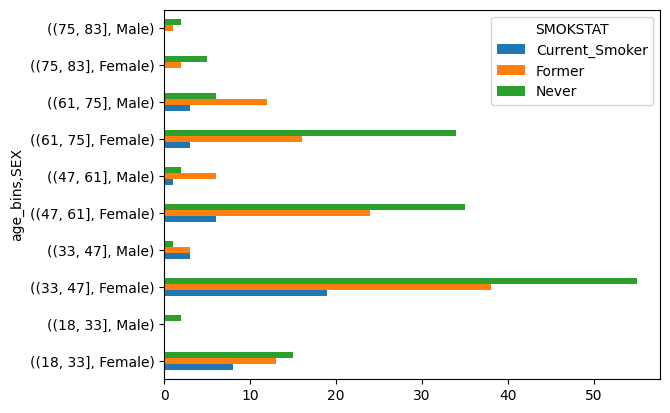

In [302]:
pd.crosstab([df.age_bins, df.SEX], df.SMOKSTAT).plot(kind='barh')

In [303]:
df\
    .groupby(['age_bins', 'SEX', 'SMOKSTAT', 'VITUSE'])\
    .agg(CALORIES_mean=('CALORIES', 'sum'), FAT_mean=('FAT', 'sum'))\
    .sort_values('SMOKSTAT', ascending=False)\
    .reset_index()

,age_bins,SEX,SMOKSTAT,VITUSE,CALORIES_mean,FAT_mean
0,"(75, 83]",Male,Never,"Yes,not often",2075.2,75.6
1,"(47, 61]",Female,Never,"Yes,not often",11421.4,495.6
2,"(33, 47]",Female,Never,"Yes,not often",29707.4,1256.3
3,"(75, 83]",Female,Never,"Yes,not often",1978.9,81.5
4,"(75, 83]",Female,Never,"Yes,fairly often",3607.5,175.3
...,...,...,...,...,...,...
85,"(61, 75]",Female,Current_Smoker,No,2755.4,104.8
86,"(61, 75]",Female,Current_Smoker,"Yes,fairly often",0.0,0.0
87,"(61, 75]",Female,Current_Smoker,"Yes,not often",1678.5,82.3
88,"(61, 75]",Male,Current_Smoker,No,11770.6,408.8


In [304]:
b = pd.pivot_table(df,
               index=["SEX", "SMOKSTAT", "age_bins", "ALCOHOL", "FIBER"],
               values=["CALORIES", "FAT", "CHOLESTEROL"],
               fill_value=0).reset_index()

Потребление клетчатки в день женщинами

In [305]:
b.query('SEX =="Female"').sort_values("FIBER", ascending=False).head(15)

,SEX,SMOKSTAT,age_bins,ALCOHOL,FIBER,CALORIES,CHOLESTEROL,FAT
255,Female,Never,"(61, 75]",0.6,36.8,2511.5,228.3,92.3
229,Female,Never,"(47, 61]",7.3,35.4,1902.9,175.6,72.9
209,Female,Never,"(47, 61]",0.0,33.8,2837.3,192.1,84.2
217,Female,Never,"(47, 61]",0.6,30.2,2512.0,168.5,64.9
246,Female,Never,"(61, 75]",0.0,28.7,2213.9,255.1,52.0
65,Female,Former,"(33, 47]",0.5,26.5,2449.5,332.6,97.5
64,Female,Former,"(33, 47]",0.5,26.2,3258.3,341.7,101.2
218,Female,Never,"(47, 61]",1.2,25.2,3098.9,447.6,106.2
78,Female,Former,"(33, 47]",4.5,24.0,2838.8,252.4,88.5
117,Female,Former,"(61, 75]",0.0,23.9,2115.4,189.5,84.1


Потребление клетчатки мужчинами

In [306]:
b.query('SEX =="Male"').sort_values("FIBER", ascending=False).head(15)

,SEX,SMOKSTAT,age_bins,ALCOHOL,FIBER,CALORIES,CHOLESTEROL,FAT
310,Male,Never,"(75, 83]",0.0,26.3,1534.7,77.5,54.9
274,Male,Current_Smoker,"(61, 75]",0.0,23.3,2654.9,248.0,126.0
309,Male,Never,"(75, 83]",0.0,21.4,2075.2,228.8,75.6
291,Male,Former,"(61, 75]",7.0,20.8,1407.6,144.1,35.0
307,Male,Never,"(61, 75]",0.0,20.4,2171.6,176.3,76.6
281,Male,Former,"(47, 61]",7.1,19.9,2433.6,271.2,127.6
276,Male,Former,"(33, 47]",0.1,17.8,2431.9,364.6,93.7
290,Male,Former,"(61, 75]",3.1,17.7,1902.4,216.7,76.7
272,Male,Current_Smoker,"(47, 61]",7.0,17.7,2798.2,239.0,125.9
299,Male,Never,"(18, 33]",10.5,17.5,3457.2,452.8,166.0


In [307]:
b.query('SEX =="Male"').sort_values("ALCOHOL", ascending=False).head(15)

,SEX,SMOKSTAT,age_bins,ALCOHOL,FIBER,CALORIES,CHOLESTEROL,FAT
275,Male,Current_Smoker,"(61, 75]",203.0,11.3,6662.2,603.0,164.3
284,Male,Former,"(47, 61]",35.0,7.5,2825.8,374.3,97.8
278,Male,Former,"(33, 47]",22.0,16.8,2706.7,416.0,104.9
302,Male,Never,"(47, 61]",21.0,11.2,2026.0,268.2,85.5
296,Male,Former,"(61, 75]",20.0,15.0,2868.5,379.5,128.8
295,Male,Former,"(61, 75]",18.2,14.6,2833.7,365.0,119.9
271,Male,Current_Smoker,"(33, 47]",15.0,11.1,2685.1,432.4,133.1
294,Male,Former,"(61, 75]",14.1,8.4,1751.1,160.3,80.7
299,Male,Never,"(18, 33]",10.5,17.5,3457.2,452.8,166.0
283,Male,Former,"(47, 61]",10.0,9.3,1896.1,296.8,82.2


In [308]:
from sklearn.model_selection import train_test_split

In [309]:
train, test = train_test_split(df, random_state=1)

можно варьировать содержание теста с помощью train_size=> (train, test = train_test_split(df, train_size=0.7))  
random_state - заморозка тестовой и контрольной выборок

In [310]:
len(train)

236

In [311]:
len(test)

79

In [312]:
len(df)

315

In [313]:
len(test) / len(df)

0.2507936507936508

In [314]:
train.isna().mean()

AGE            0.0
SEX            0.0
SMOKSTAT       0.0
QUETELET       0.0
VITUSE         0.0
CALORIES       0.0
FAT            0.0
FIBER          0.0
ALCOHOL        0.0
CHOLESTEROL    0.0
BETADIET       0.0
RETDIET        0.0
BETAPLASMA     0.0
RETPLASMA      0.0
age_bins       0.0
dtype: float64

In [315]:
df.isna().sum()

AGE            0
SEX            0
SMOKSTAT       0
QUETELET       0
VITUSE         0
CALORIES       0
FAT            0
FIBER          0
ALCOHOL        0
CHOLESTEROL    0
BETADIET       0
RETDIET        0
BETAPLASMA     0
RETPLASMA      0
age_bins       0
dtype: int64

In [316]:
train.head(3)

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA,age_bins
307,44,Female,Current_Smoker,23.27717,"Yes,not often",3183.1,119.4,6.9,35.0,378.8,1118,1257,100,926,"(33, 47]"
78,31,Female,Former,21.33144,"Yes,not often",2264.3,105.5,13.4,3.2,396.5,1846,760,233,504,"(18, 33]"
105,67,Male,Former,24.73525,No,2021.2,94.8,13.3,8.0,417.6,3359,1060,95,797,"(61, 75]"


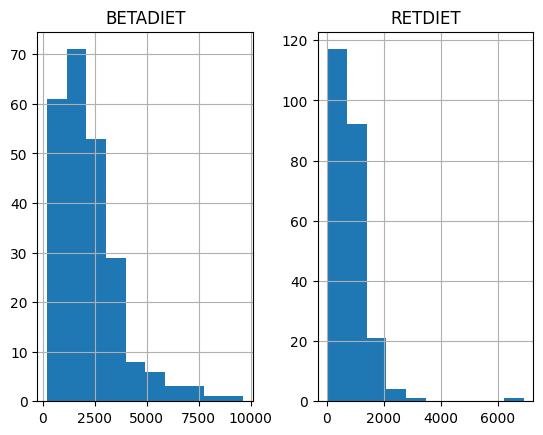

In [317]:
train[['BETADIET', 'RETDIET']].hist();

In [318]:
train[['BETADIET', 'RETDIET']].describe()

,BETADIET,RETDIET
count,236.000000,236.000000
mean,2185.084746,843.940678
std,1491.313164,608.596849
min,214.000000,30.000000
25%,1119.500000,471.250000
50%,1795.000000,726.000000
75%,2870.250000,1050.500000
max,9642.000000,6901.000000


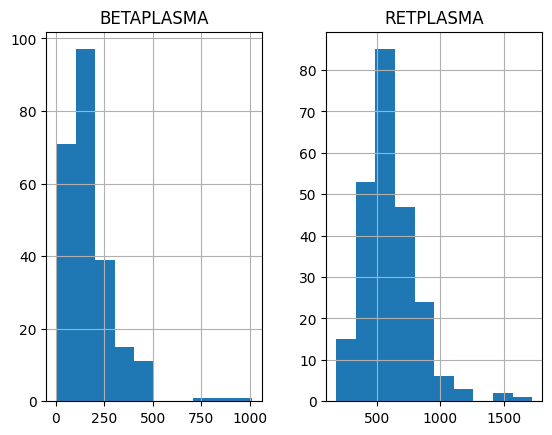

In [319]:
train[['BETAPLASMA', 'RETPLASMA']].hist();

In [320]:
train[['BETAPLASMA', 'RETPLASMA']].describe()

,BETAPLASMA,RETPLASMA
count,236.000000,236.000000
mean,172.394068,603.546610
std,130.613941,215.341238
min,0.000000,179.000000
25%,89.000000,466.000000
50%,137.500000,560.500000
75%,213.000000,721.000000
max,1010.000000,1727.000000


In [321]:
train.groupby('AGE')[['BETAPLASMA', 'RETPLASMA']].agg(['count', 'mean', 'median']).reset_index()

AGE BETAPLASMA                    RETPLASMA                   
            count        mean median     count        mean median
0   19          1  327.000000  327.0         1  693.000000  693.0
1   22          2   33.000000   33.0         2  565.500000  565.5
2   24          1   67.000000   67.0         1  376.000000  376.0
3   25          2   64.500000   64.5         2  487.500000  487.5
4   26          1   74.000000   74.0         1  544.000000  544.0
5   27          1   89.000000   89.0         1  323.000000  323.0
6   28          1   88.000000   88.0         1  792.000000  792.0
7   29          3  135.666667  129.0         3  495.000000  366.0
8   30          1  129.000000  129.0         1  537.000000  537.0
9   31          4  173.250000  171.0         4  542.250000  527.0
10  32          4  146.500000  163.0         4  637.500000  602.5
11  33          7   86.428571   70.0         7  429.000000  444.0
12  34          5  114.400000  113.0         5  580.400000  525.0
13  35          5  162.200000  206.0         5  567.600000  553.0
14  36          6  129.333333  121.0         6  553.666667  507.5
15  37          9  122.555556  129.0         9  519.000000  520.0
16  38          8  216.875000  202.0         8  477.250000  436.0
17  39          4  292.500000  300.0         4  540.500000  533.0
18  40          6  172.833333  156.0         6  596.333333  587.5
19  41         11  139.181818  117.0        11  554.727273  526.0
20  42          5  139.200000  121.0         5  664.000000  737.0
21  43          8  299.000000  227.0         8  566.000000  582.0
22  44          8  117.000000  114.5         8  549.125000  528.0
23  45          6  154.833333  155.0         6  601.833333  576.0
24  46          9  189.333333  210.0         9  495.444444  495.0
25  47          2  131.000000  131.0         2  608.000000  608.0
26  48          4  120.250000  123.0         4  643.500000  630.5
27  49          8  226.500000  199.0         8  691.375000  544.0
28  50          5  231.200000  274.0         5  654.600000  592.0
29  51          3  223.333333  180.0         3  637.000000  622.0
30  52          3  105.333333  105.0         3  600.666667  625.0
31  53          5  178.200000  138.0         5  576.000000  502.0
32  54          3  156.333333  121.0         3  825.333333  543.0
33  55          5  116.000000   99.0         5  672.600000  670.0
34  56          6  213.666667  123.5         6  645.333333  651.5
35  57          3   99.333333  108.0         3  895.000000  564.0
36  58          3   98.000000   95.0         3  621.666667  574.0
37  59          1  165.000000  165.0         1  734.000000  734.0
38  60          3  144.666667  143.0         3  556.000000  550.0
39  61          1   87.000000   87.0         1  397.000000  397.0
40  62          4  184.250000  159.5         4  602.750000  610.5
41  63          1  366.000000  366.0         1  535.000000  535.0
42  64          4  168.250000  156.0         4  638.000000  506.0
43  65          6  141.500000  144.5         6  539.833333  503.0
44  66          8  132.375000  105.0         8  747.625000  784.0
45  67          3   78.000000   73.0         3  876.000000  836.0
46  69          4  157.500000  149.5         4  606.500000  641.0
47  70          6  283.166667  262.0         6  679.666667  611.5
48  71          4  276.000000  273.0         4  763.000000  744.5
49  72          2   58.000000   58.0         2  694.500000  694.5
50  73          3   99.666667  127.0         3  598.333333  558.0
51  74          6  234.000000  239.5         6  663.666667  626.0
52  75          5  419.200000  288.0         5  667.800000  546.0
53  76          1  124.000000  124.0         1  727.000000  727.0
54  77          2  178.500000  178.5         2  620.000000  620.0
55  78          2  203.500000  203.5         2  653.000000  653.0
56  82          1  429.000000  429.0         1  599.000000  599.0
57  83          1  253.000000  253.0         1  629.000000  629.0

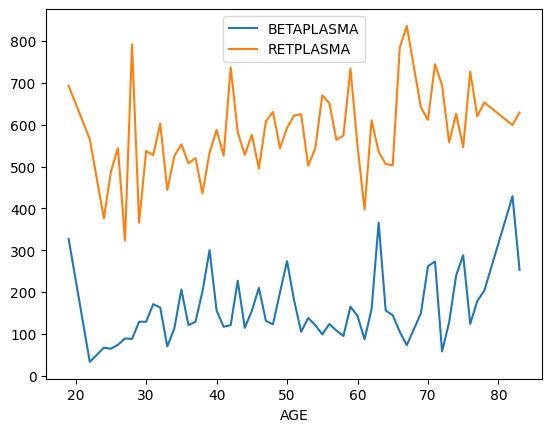

In [322]:
train.groupby('AGE')[['BETAPLASMA', 'RETPLASMA']].median().plot();

In [323]:
train.head(3)

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA,age_bins
307,44,Female,Current_Smoker,23.27717,"Yes,not often",3183.1,119.4,6.9,35.0,378.8,1118,1257,100,926,"(33, 47]"
78,31,Female,Former,21.33144,"Yes,not often",2264.3,105.5,13.4,3.2,396.5,1846,760,233,504,"(18, 33]"
105,67,Male,Former,24.73525,No,2021.2,94.8,13.3,8.0,417.6,3359,1060,95,797,"(61, 75]"


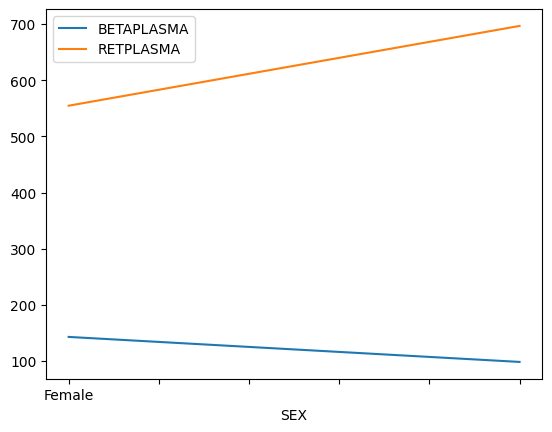

In [324]:
train.groupby('SEX')[['BETAPLASMA', 'RETPLASMA']].median().plot();

In [325]:
train.SEX.value_counts()

Female    204
Male       32
Name: SEX, dtype: int64

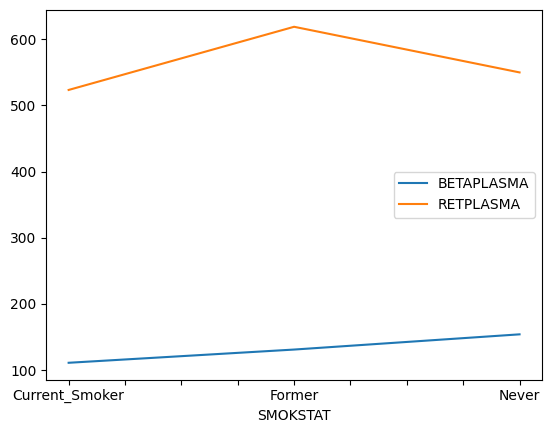

In [326]:
train.groupby('SMOKSTAT')[['BETAPLASMA', 'RETPLASMA']].median().plot();

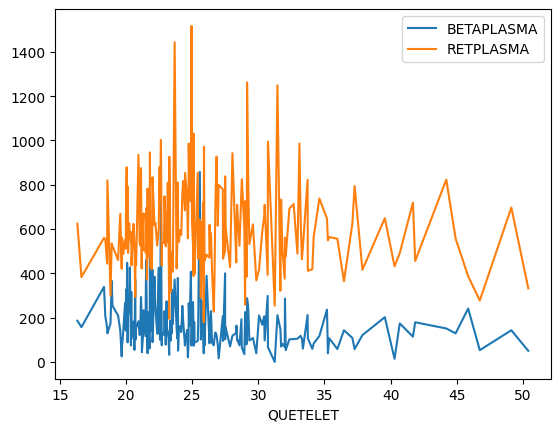

In [327]:
train.groupby('QUETELET')[['BETAPLASMA', 'RETPLASMA']].median().plot();

In [328]:
train[train.QUETELET > 35].value_counts()

AGE  SEX     SMOKSTAT        QUETELET  VITUSE            CALORIES  FAT    FIBER  ALCOHOL  CHOLESTEROL  BETADIET  RETDIET  BETAPLASMA  RETPLASMA  age_bins
22   Female  Never           50.40333  No                1511.7    64.4   10.2   0.0      190.3        1074      399      50          332        (18, 33]    1
46   Male    Current_Smoker  35.25969  No                2667.5    131.6  10.1   0.0      550.5        1210      1291     39          549        (33, 47]    1
75   Female  Never           36.47368  Yes,not often     1380.6    54.5   13.5   0.1      201.6        925       707      143         364        (61, 75]    1
69   Female  Former          44.20619  No                2332.2    109.6  19.7   0.1      286.7        4013      1485     151         823        (61, 75]    1
60   Female  Never           49.12033  Yes,fairly often  2114.8    77.6   14.9   0.5      239.9        4916      1150     143         697        (47, 61]    1
54   Female  Never           37.86868  Yes,fairly o

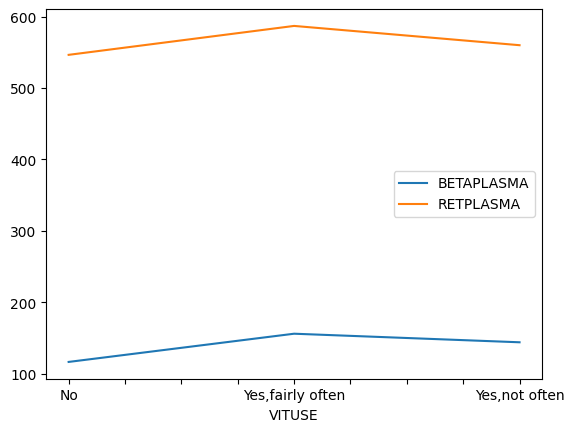

In [329]:
train.groupby('VITUSE')[['BETAPLASMA', 'RETPLASMA']].median().plot();

In [330]:
train.VITUSE.value_counts()

No                  88
Yes,fairly often    79
Yes,not often       69
Name: VITUSE, dtype: int64

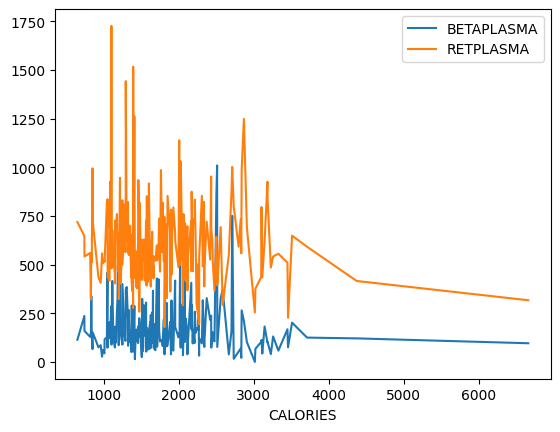

In [331]:
train.groupby('CALORIES')[['BETAPLASMA', 'RETPLASMA']].median().plot();

In [332]:
train[train.CALORIES > 3500].value_counts()

AGE  SEX     SMOKSTAT        QUETELET  VITUSE            CALORIES  FAT    FIBER  ALCOHOL  CHOLESTEROL  BETADIET  RETDIET  BETAPLASMA  RETPLASMA  age_bins
32   Female  Never           39.56196  Yes,not often     3511.1    114.7  13.9   0.2      444.7        2174      1814     202         649        (18, 33]    1
43   Female  Former          23.03810  Yes,fairly often  3711.0    202.7  14.9   18.0     469.2        1861      783      125         592        (33, 47]    1
54   Female  Never           37.86868  Yes,fairly often  4373.6    235.9  22.9   0.1      814.7        2912      2104     121         416        (47, 61]    1
65   Male    Current_Smoker  23.37617  No                6662.2    164.3  11.3   203.0    603.0        2893      1364     96          317        (61, 75]    1
dtype: int64

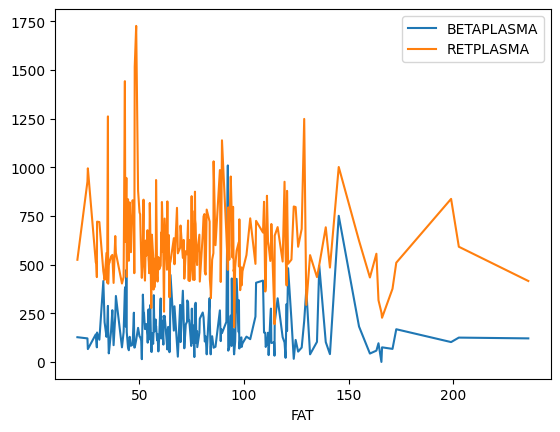

In [333]:
train.groupby('FAT')[['BETAPLASMA', 'RETPLASMA']].median().plot();

In [334]:
train[train.FAT > 150].value_counts()

AGE  SEX     SMOKSTAT        QUETELET  VITUSE            CALORIES  FAT    FIBER  ALCOHOL  CHOLESTEROL  BETADIET  RETDIET  BETAPLASMA  RETPLASMA  age_bins
24   Female  Never           31.99715  No                3021.9    171.0  11.4   0.1      466.3        953       1176     67          376        (18, 33]    1
32   Female  Former          35.97525  Yes,not often     3328.4    163.3  20.0   4.1      425.5        3434      2167     58          556        (18, 33]    1
33   Female  Former          20.56960  Yes,not often     3144.8    155.0  17.6   4.1      308.8        3141      1579     182         623        (18, 33]    1
     Male    Never           26.63693  Yes,fairly often  3457.2    166.0  17.5   10.5     452.8        2629      1470     75          227        (18, 33]    1
35   Female  Former          34.08181  No                3114.0    160.2  14.9   0.2      432.3        1702      1224     43          434        (33, 47]    1
40   Female  Never           31.24219  Yes,fairly o

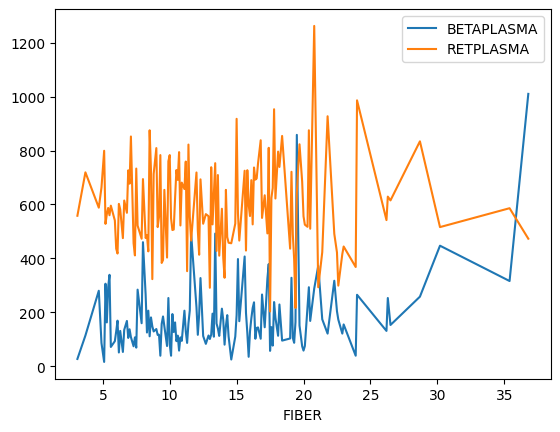

In [335]:
train.groupby('FIBER')[['BETAPLASMA', 'RETPLASMA']].median().plot();

In [336]:
train[train.FIBER > 23].value_counts()

AGE  SEX     SMOKSTAT  QUETELET  VITUSE            CALORIES  FAT    FIBER  ALCOHOL  CHOLESTEROL  BETADIET  RETDIET  BETAPLASMA  RETPLASMA  age_bins
36   Female  Former    24.74345  Yes,not often     2838.8    88.5   24.0   4.5      252.4        9642      634      265         986        (33, 47]    1
40   Female  Former    25.14062  No                2449.5    97.5   26.5   0.5      332.6        1061      864      153         615        (33, 47]    1
41   Female  Former    23.09389  Yes,fairly often  3258.3    101.2  26.2   0.5      341.7        1306      1163     131         542        (33, 47]    1
49   Female  Never     20.08955  Yes,fairly often  2512.0    64.9   30.2   0.6      168.5        4832      793      447         516        (47, 61]    1
50   Female  Never     20.40345  No                1902.9    72.9   35.4   7.3      175.6        3549      969      316         586        (47, 61]    1
62   Female  Former    29.84944  No                2115.4    84.1   23.9   0.0      189

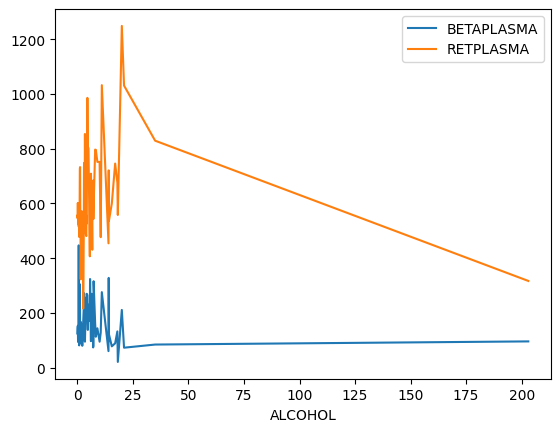

In [337]:
train.groupby('ALCOHOL')[['BETAPLASMA', 'RETPLASMA']].median().plot();

In [338]:
train[train.ALCOHOL > 25].value_counts()

AGE  SEX     SMOKSTAT        QUETELET  VITUSE         CALORIES  FAT    FIBER  ALCOHOL  CHOLESTEROL  BETADIET  RETDIET  BETAPLASMA  RETPLASMA  age_bins
44   Female  Current_Smoker  23.27717  Yes,not often  3183.1    119.4  6.9    35.0     378.8        1118      1257     100         926        (33, 47]    1
49   Male    Former          31.72627  No             2825.8    97.8   7.5    35.0     374.3        1112      735      69          733        (47, 61]    1
65   Male    Current_Smoker  23.37617  No             6662.2    164.3  11.3   203.0    603.0        2893      1364     96          317        (61, 75]    1
dtype: int64

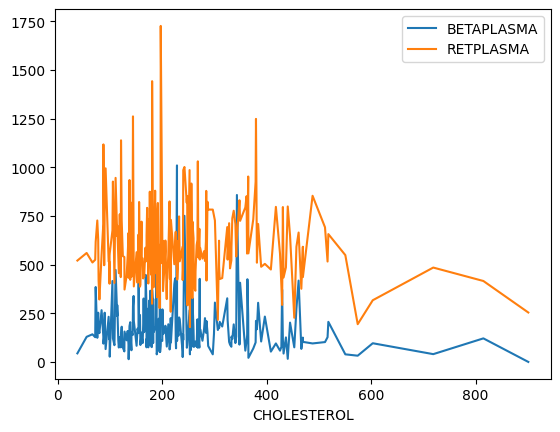

In [339]:
train.groupby('CHOLESTEROL')[['BETAPLASMA', 'RETPLASMA']].median().plot();

In [340]:
train[train.CHOLESTEROL > 500].value_counts()

AGE  SEX     SMOKSTAT        QUETELET  VITUSE            CALORIES  FAT    FIBER  ALCOHOL  CHOLESTEROL  BETADIET  RETDIET  BETAPLASMA  RETPLASMA  age_bins
33   Female  Current_Smoker  20.16133  No                3228.0    141.1  14.4   0.0      718.8        1301      307      40          485        (18, 33]    1
     Male    Never           23.26895  Yes,not often     2271.1    114.6  10.4   0.0      574.2        1270      544      32          194        (18, 33]    1
35   Female  Never           30.44551  No                1884.8    91.6   11.1   5.0      518.0        758       454      206         657        (33, 47]    1
40   Female  Never           31.24219  Yes,fairly often  3014.9    165.7  14.4   0.0      900.7        1028      3061     0           254        (33, 47]    1
46   Male    Current_Smoker  35.25969  No                2667.5    131.6  10.1   0.0      550.5        1210      1291     39          549        (33, 47]    1
48   Female  Former          32.34834  Yes,fairly o

In [341]:
br_max = train.query('BETAPLASMA > 1000 or RETPLASMA > 750')
br_min = train.query('BETAPLASMA < 1000 or RETPLASMA < 750')

In [342]:
br_max.describe()

,AGE,QUETELET,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,54.833333,25.813465,1860.000000,78.177083,13.822917,4.185417,246.212500,2355.437500,814.270833,185.770833,913.375000
std,14.513872,4.710637,621.601302,33.895937,5.979762,7.003433,103.361651,1873.449838,494.189073,175.496286,214.357191
min,22.000000,18.600300,849.200000,25.200000,5.100000,0.000000,87.500000,326.000000,159.000000,16.000000,473.000000
25%,44.000000,22.534613,1374.900000,49.925000,10.150000,0.000000,167.350000,1119.500000,453.000000,93.500000,798.500000
50%,55.500000,24.739350,1786.150000,75.600000,11.750000,0.650000,247.100000,1706.500000,694.500000,133.500000,837.000000
75%,67.000000,28.135597,2237.375000,93.900000,16.950000,6.400000,308.550000,3166.250000,991.750000,211.250000,947.750000
max,77.000000,44.206190,3184.800000,199.000000,36.800000,35.000000,487.800000,9642.000000,2571.000000,1010.000000,1727.000000


In [343]:
br_min.describe()

,AGE,QUETELET,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,49.881356,26.089199,1825.651695,79.041102,12.897881,3.608475,244.155932,2185.084746,843.940678,172.394068,603.546610
std,14.547746,5.992251,708.707151,34.991890,5.465189,14.009338,128.464521,1491.313164,608.596849,130.613941,215.341238
min,19.000000,16.331140,647.700000,20.400000,3.100000,0.000000,37.700000,214.000000,30.000000,0.000000,179.000000
25%,38.000000,21.760998,1378.625000,54.875000,9.175000,0.000000,162.175000,1119.500000,471.250000,89.000000,466.000000
50%,46.500000,24.773720,1661.400000,73.700000,12.100000,0.300000,215.100000,1795.000000,726.000000,137.500000,560.500000
75%,62.250000,28.733320,2130.300000,95.975000,15.925000,3.700000,307.075000,2870.250000,1050.500000,213.000000,721.000000
max,83.000000,50.403330,6662.200000,235.900000,36.800000,203.000000,900.700000,9642.000000,6901.000000,1010.000000,1727.000000


In [344]:
train[['AGE', 'CALORIES']].mean()

AGE           49.881356
CALORIES    1825.651695
dtype: float64

In [345]:
train['age_prediction_mean'] = train['AGE'].mean()
train['calories_prediction_mean'] = train['CALORIES'].mean()

In [346]:
train.head(3)

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA,age_bins,age_prediction_mean,calories_prediction_mean
307,44,Female,Current_Smoker,23.27717,"Yes,not often",3183.1,119.4,6.9,35.0,378.8,1118,1257,100,926,"(33, 47]",49.881356,1825.651695
78,31,Female,Former,21.33144,"Yes,not often",2264.3,105.5,13.4,3.2,396.5,1846,760,233,504,"(18, 33]",49.881356,1825.651695
105,67,Male,Former,24.73525,No,2021.2,94.8,13.3,8.0,417.6,3359,1060,95,797,"(61, 75]",49.881356,1825.651695


In [347]:
train['age_error'] = train['age_prediction_mean'] - train['AGE']
train['calories_error'] = train['calories_prediction_mean'] - train['CALORIES']

In [348]:
train.head()

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA,age_bins,age_prediction_mean,calories_prediction_mean,age_error,calories_error
307,44,Female,Current_Smoker,23.27717,"Yes,not often",3183.1,119.4,6.9,35.0,378.8,1118,1257,100,926,"(33, 47]",49.881356,1825.651695,5.881356,-1357.448305
78,31,Female,Former,21.33144,"Yes,not often",2264.3,105.5,13.4,3.2,396.5,1846,760,233,504,"(18, 33]",49.881356,1825.651695,18.881356,-438.648305
105,67,Male,Former,24.73525,No,2021.2,94.8,13.3,8.0,417.6,3359,1060,95,797,"(61, 75]",49.881356,1825.651695,-17.118644,-195.548305
125,43,Female,Never,20.29700,No,2075.9,96.5,17.3,7.0,271.8,3318,651,427,572,"(33, 47]",49.881356,1825.651695,6.881356,-250.248305
297,73,Female,Former,25.84728,"Yes,not often",853.1,29.8,6.3,10.0,160.5,1022,125,151,721,"(61, 75]",49.881356,1825.651695,-23.118644,972.551695


In [349]:
train['age_er_abs'] = abs(train['age_error'])
train['cal_er_abs'] = abs(train['calories_error'])

In [350]:
train.head(3)

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,...,RETDIET,BETAPLASMA,RETPLASMA,age_bins,age_prediction_mean,calories_prediction_mean,age_error,calories_error,age_er_abs,cal_er_abs
307,44,Female,Current_Smoker,23.27717,"Yes,not often",3183.1,119.4,6.9,35.0,378.8,...,1257,100,926,"(33, 47]",49.881356,1825.651695,5.881356,-1357.448305,5.881356,1357.448305
78,31,Female,Former,21.33144,"Yes,not often",2264.3,105.5,13.4,3.2,396.5,...,760,233,504,"(18, 33]",49.881356,1825.651695,18.881356,-438.648305,18.881356,438.648305
105,67,Male,Former,24.73525,No,2021.2,94.8,13.3,8.0,417.6,...,1060,95,797,"(61, 75]",49.881356,1825.651695,-17.118644,-195.548305,17.118644,195.548305


In [351]:
train[['age_er_abs', 'cal_er_abs']].mean()

age_er_abs     12.316432
cal_er_abs    517.177844
dtype: float64

In [352]:
train['age_er_abs_prc'] = train['age_er_abs'] / train['AGE']
train['cal_er_abs_prc'] = train['cal_er_abs'] / train['CALORIES']

In [353]:
train.head(3)

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,...,RETPLASMA,age_bins,age_prediction_mean,calories_prediction_mean,age_error,calories_error,age_er_abs,cal_er_abs,age_er_abs_prc,cal_er_abs_prc
307,44,Female,Current_Smoker,23.27717,"Yes,not often",3183.1,119.4,6.9,35.0,378.8,...,926,"(33, 47]",49.881356,1825.651695,5.881356,-1357.448305,5.881356,1357.448305,0.133667,0.426455
78,31,Female,Former,21.33144,"Yes,not often",2264.3,105.5,13.4,3.2,396.5,...,504,"(18, 33]",49.881356,1825.651695,18.881356,-438.648305,18.881356,438.648305,0.609076,0.193724
105,67,Male,Former,24.73525,No,2021.2,94.8,13.3,8.0,417.6,...,797,"(61, 75]",49.881356,1825.651695,-17.118644,-195.548305,17.118644,195.548305,0.255502,0.096749


In [354]:
train['age_er_abs_prc'].mean(), train['cal_er_abs_prc'].mean()

(0.2737714067176845, 0.31465579287803414)

In [355]:
train['age_prediction_median'] = train['AGE'].median()
train['clories_prediction_median'] = train['CALORIES'].median()

In [356]:
train.head(3)

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,...,age_prediction_mean,calories_prediction_mean,age_error,calories_error,age_er_abs,cal_er_abs,age_er_abs_prc,cal_er_abs_prc,age_prediction_median,clories_prediction_median
307,44,Female,Current_Smoker,23.27717,"Yes,not often",3183.1,119.4,6.9,35.0,378.8,...,49.881356,1825.651695,5.881356,-1357.448305,5.881356,1357.448305,0.133667,0.426455,46.5,1661.4
78,31,Female,Former,21.33144,"Yes,not often",2264.3,105.5,13.4,3.2,396.5,...,49.881356,1825.651695,18.881356,-438.648305,18.881356,438.648305,0.609076,0.193724,46.5,1661.4
105,67,Male,Former,24.73525,No,2021.2,94.8,13.3,8.0,417.6,...,49.881356,1825.651695,-17.118644,-195.548305,17.118644,195.548305,0.255502,0.096749,46.5,1661.4


In [357]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [358]:
mean_absolute_error(train['AGE'], train['age_prediction_mean'])

12.316432059752946

In [359]:
mean_absolute_error(train['CALORIES'], train['calories_prediction_mean'])

517.1778440103419

In [360]:
train[['age_er_abs', 'cal_er_abs']].mean()

age_er_abs     12.316432
cal_er_abs    517.177844
dtype: float64

Сходится с abs

In [361]:
mean_absolute_percentage_error(train['AGE'], train['age_prediction_mean'])

0.27377140671768435

In [362]:
mean_absolute_percentage_error(train['CALORIES'], train['calories_prediction_mean'])

0.31465579287803397

In [363]:
train['age_er_abs_prc'].mean(), train['cal_er_abs_prc'].mean()

(0.2737714067176845, 0.31465579287803414)

In [364]:
mean_absolute_error(train['AGE'], train['age_prediction_median'])

12.14406779661017

In [365]:
mean_absolute_error(train['CALORIES'], train['clories_prediction_median'])

504.43559322033894

In [366]:
mean_absolute_percentage_error(train['AGE'], train['age_prediction_median'])

0.25186900062201206

In [367]:
mean_absolute_percentage_error(train['CALORIES'], train['clories_prediction_median'])

0.2795954991667116

предсказываем медиану теста

In [368]:
test['age_prediction_median'] = train['AGE'].median()
test['clories_prediction_median'] = train['CALORIES'].median()

In [369]:
test.head()

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA,age_bins,age_prediction_median,clories_prediction_median
165,63,Female,Never,23.92168,"Yes,fairly often",1282.3,26.4,13.6,0.1,100.6,3753,649,296,701,"(61, 75]",46.5,1661.4
161,39,Female,Former,21.94091,"Yes,not often",1719.3,49.7,18.4,11.0,164.6,5296,554,357,474,"(33, 47]",46.5,1661.4
271,44,Female,Current_Smoker,29.97738,No,1877.4,92.2,7.7,0.2,211.6,1665,937,94,791,"(33, 47]",46.5,1661.4
201,49,Female,Current_Smoker,22.72159,"Yes,fairly often",784.4,40.6,4.9,3.0,97.4,852,311,116,602,"(47, 61]",46.5,1661.4
186,48,Female,Never,32.99127,"Yes,fairly often",445.2,14.4,5.0,0.0,102.8,862,160,108,493,"(47, 61]",46.5,1661.4


In [370]:
mean_absolute_error(test['AGE'], test['age_prediction_median'])

12.145569620253164

In [371]:
mean_absolute_error(test['CALORIES'], test['clories_prediction_median'])

455.89367088607594

In [372]:
mean_absolute_percentage_error(test['AGE'], test['age_prediction_median'])

0.24320308561668064

In [373]:
mean_absolute_percentage_error(test['CALORIES'], test['clories_prediction_median'])

0.32336124750693246

In [375]:
train.head()

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,...,age_prediction_mean,calories_prediction_mean,age_error,calories_error,age_er_abs,cal_er_abs,age_er_abs_prc,cal_er_abs_prc,age_prediction_median,clories_prediction_median
307,44,Female,Current_Smoker,23.27717,"Yes,not often",3183.1,119.4,6.9,35.0,378.8,...,49.881356,1825.651695,5.881356,-1357.448305,5.881356,1357.448305,0.133667,0.426455,46.5,1661.4
78,31,Female,Former,21.33144,"Yes,not often",2264.3,105.5,13.4,3.2,396.5,...,49.881356,1825.651695,18.881356,-438.648305,18.881356,438.648305,0.609076,0.193724,46.5,1661.4
105,67,Male,Former,24.73525,No,2021.2,94.8,13.3,8.0,417.6,...,49.881356,1825.651695,-17.118644,-195.548305,17.118644,195.548305,0.255502,0.096749,46.5,1661.4
125,43,Female,Never,20.29700,No,2075.9,96.5,17.3,7.0,271.8,...,49.881356,1825.651695,6.881356,-250.248305,6.881356,250.248305,0.160032,0.120549,46.5,1661.4
297,73,Female,Former,25.84728,"Yes,not often",853.1,29.8,6.3,10.0,160.5,...,49.881356,1825.651695,-23.118644,972.551695,23.118644,972.551695,0.316694,1.140021,46.5,1661.4
